In [ ]:
#Data Gathering...
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **Training Part**

In [ ]:
COMMAN_PATH = '/content/gdrive/"My Drive"/Split_Dataset/train-data/'

In [ ]:
PATH_OF_DATA = COMMAN_PATH + '/COVID-19'
lis = !ls {PATH_OF_DATA}

In [ ]:
PATH_OF_DATA= COMMAN_PATH + '/NORMAL'
norm = !ls {PATH_OF_DATA}

In [ ]:
PATH_OF_DATA= COMMAN_PATH + '/"Viral Pneumonia"'
pnm = !ls {PATH_OF_DATA}

In [ ]:
lis[0]

"'COVID-19 (100).png'  'COVID-19(159).png'  'COVID-19 (43).png'"

In [ ]:
norm[0]

"'NORMAL (1000).png'  'NORMAL (187).png'  'NORMAL (459).png'  'NORMAL (730).png'"

In [ ]:
pnm[0]

"'Viral Pneumonia (1000).png'  'Viral Pneumonia (458).png'"

In [ ]:
#Import Statements for Preprocessing, Training and Testing
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Conv1D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import cv2
import math
import os
COMMAN_PATH = 'gdrive/My Drive/Split_Dataset/train-data'
img_height, img_width = 256, 256

In [ ]:
lis2=[]
for i in lis:
  for j in range(3):
    start=i.find('\'')
    end=i.find('\'', start+1)

    if start>=0:
      temp_name = i[start+1:end]
      full_path = os.path.join(COMMAN_PATH, 'COVID-19', temp_name)
      lis2.append(full_path)
      i=i.replace(i[start:end+1], '', 1)

In [ ]:
norm2=[]
for i in norm:
  for j in range(4):
    start=i.find('\'')
    end=i.find('\'', start+1)

    if start>=0:
      temp_name = i[start+1:end]
      full_path = os.path.join(COMMAN_PATH, 'NORMAL', temp_name)
      norm2.append(full_path)
      i=i.replace(i[start:end+1], '', 1)

In [ ]:
pnm2=[]
for i in pnm:
  for j in range(2):
    start=i.find('\'')
    end=i.find('\'', start+1)

    if start>=0:
      temp_name = i[start+1:end]
      full_path = os.path.join(COMMAN_PATH, 'Viral Pneumonia', temp_name)
      pnm2.append(full_path)
      i=i.replace(i[start:end+1], '', 1)

In [ ]:
print("Pneumatic : {0}\nCovid : {1}\nNormal : {2}".format(len(pnm2), len(lis2), len(norm2)))

Pneumatic : 1206
Covid : 184
Normal : 1206


In [ ]:
norm2[0]

'gdrive/My Drive/Split_Dataset/train-data/NORMAL/NORMAL (1000).png'

In [ ]:
x_train1 = []
for images in range(len(lis2)):
  # print("Image : {}".format(lis2[images]))
  # image = cv2.imread(lis2[images], 1)
  image = cv2.imread(lis2[images])
  #height, width = image.shape[:2]
  flippedimage1 = cv2.flip(image, 1)
  flippedimage2 = cv2.flip(image, 0)
  x_train1.append(cv2.resize(image, (img_height, img_width)))
  x_train1.append(cv2.resize(flippedimage1, (img_height, img_width)))
  x_train1.append(cv2.resize(flippedimage2, (img_height, img_width)))
  # image = image[ math.ceil((1/10)*width) : width - math.ceil((1/10)*width), math.ceil((3/20)*height) : height - math.ceil((1/20)*height) ]
  # flippedimage = cv2.flip(image, 1)
  # x_train1.append(cv2.resize(image, (64,64)))
  # x_train1.append(cv2.resize(flippedimage, (64,64)))

In [ ]:
x_train1 = np.array(x_train1)
x_train1.shape

(552, 256, 256, 3)

In [ ]:
x_train2 = []
for i in range(len(pnm2)):
  image = cv2.imread(pnm2[i])
  #height, width = image.shape[:2]
  #image = image[ math.floor((1/10)*width) : width - math.floor((1/10)*width), math.floor((3/20)*height) : height - math.floor((1/20)*height) ]
  flippedimage1 = cv2.flip(image, 1)
  flippedimage2 = cv2.flip(image, 0)
  x_train2.append(cv2.resize(image, (img_height, img_width)))
  x_train2.append(cv2.resize(flippedimage1, (img_height, img_width)))
  x_train2.append(cv2.resize(flippedimage2, (img_height, img_width)))

In [ ]:
x_train2 = np.array(x_train2)
x_train2.shape

(3618, 256, 256, 3)

In [ ]:

x_train3 = []
for i in range(len(norm2)):
  image = cv2.imread(norm2[i])
  #height, width = image.shape[:2]
  #image = image[ math.floor((1/10)*width) : width - math.floor((1/10)*width), math.floor((3/20)*height) : height - math.floor((1/20)*height) ]
  flippedimage1 = cv2.flip(image, 1)
  flippedimage2 = cv2.flip(image, 0)
  x_train3.append(cv2.resize(image, (img_height, img_width)))
  x_train3.append(cv2.resize(flippedimage1, (img_height, img_width)))
  x_train3.append(cv2.resize(flippedimage2, (img_height, img_width)))

In [ ]:
x_train3 = np.array(x_train3)
x_train3.shape

(3618, 256, 256, 3)

In [ ]:
x_train = np.vstack((x_train1, x_train2, x_train3)) 

In [ ]:
x_train.shape

(7788, 256, 256, 3)

In [ ]:
y_train1 = np.zeros((len(x_train1),1), dtype='int32')
y_train2 = np.ones((len(x_train2),1), dtype='int32')
y_train3 = np.full((len(x_train3),1), 2)

In [ ]:
y_train = np.vstack((y_train1, y_train2, y_train3))

In [ ]:
y_train_one_hot = to_categorical(y_train)

In [ ]:
y_train.shape

(7788, 1)

In [ ]:
y_train_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
print("Y shape:" ,y_train_one_hot.shape)
print("X Shape:", x_train.shape)

Y shape: (7788, 3)
X Shape: (7788, 256, 256, 3)


In [ ]:
#Model Making...
model = Sequential()

model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(img_height, img_width,3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv1D(32, 2, activation='relu', input_shape=(img_height, img_width,32)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv1D(32, 2, activation='relu', input_shape=(img_height, img_width,32)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(900, activation='relu'))

#model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))

# model.add(Dropout(0.2))

#model.add(Dense(300))

#model.add(Dropout(0.10))

model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 62, 61, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 30, 32)        0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 31, 29, 32)        2

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#Training Phase...
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=32,
                 epochs=30,
                 initial_epoch=0,
                 shuffle=True,
                 validation_split=0.1,)

Epoch 1/30
220/220 [==============================] - 554s 3s/step - loss: 10.7945 - accuracy: 0.6242 - val_loss: 0.0590 - val_accuracy: 0.9910
Epoch 2/30
220/220 [==============================] - 552s 3s/step - loss: 0.2415 - accuracy: 0.9138 - val_loss: 0.1609 - val_accuracy: 0.9525
Epoch 3/30
220/220 [==============================] - 552s 3s/step - loss: 0.1929 - accuracy: 0.9334 - val_loss: 0.0846 - val_accuracy: 0.9795
Epoch 4/30
220/220 [==============================] - 552s 3s/step - loss: 0.1610 - accuracy: 0.9389 - val_loss: 0.1282 - val_accuracy: 0.9628
Epoch 5/30
220/220 [==============================] - 552s 3s/step - loss: 0.1323 - accuracy: 0.9527 - val_loss: 0.1546 - val_accuracy: 0.9730
Epoch 6/30
220/220 [==============================] - 550s 3s/step - loss: 0.1382 - accuracy: 0.9529 - val_loss: 0.0982 - val_accuracy: 0.9769
Epoch 7/30
220/220 [==============================] - 548s 2s/step - loss: 0.1765 - accuracy: 0.9376 - val_loss: 0.0715 - val_accuracy: 0.984

In [ ]:
model.save('covid_model_file_128_val_94.h5')
#/content/covid_model_file

In [ ]:
#Testing Part

# **Testing Part**

In [ ]:
names = ['COVID-19 Positive', 'Pneumatic Patient', 'NORMAL']

In [ ]:
COMMAN_PATH = '/content/gdrive/"My Drive"/Split_Dataset/test-data/'

In [ ]:
PATH_OF_DATA = COMMAN_PATH + '/COVID-19'
lis_test = !ls {PATH_OF_DATA}

In [ ]:
PATH_OF_DATA= COMMAN_PATH + '/"Viral Pneumonia"'
pnm_test = !ls {PATH_OF_DATA}

In [ ]:
PATH_OF_DATA= COMMAN_PATH + '/NORMAL'
norm_test = !ls {PATH_OF_DATA}

In [ ]:
pnm_test[0]

"'Viral Pneumonia (1207).png'  'Viral Pneumonia (1277).png'"

In [ ]:
COMMAN_PATH = 'gdrive/My Drive/Split_Dataset/test-data'

In [ ]:
lis2_test=[]
for i in lis_test:
  for j in range(3):
    start=i.find('\'')
    end=i.find('\'', start+1)

    if start>=0:
      temp_name = i[start+1:end]
      full_path = os.path.join(COMMAN_PATH, 'COVID-19', temp_name)
      lis2_test.append(full_path)
      i=i.replace(i[start:end+1], '', 1)

In [ ]:
norm2_test=[]
for i in norm_test:
  for j in range(3):
    start=i.find('\'')
    end=i.find('\'', start+1)

    if start>=0:
      temp_name = i[start+1:end]
      full_path = os.path.join(COMMAN_PATH, 'NORMAL', temp_name)
      norm2_test.append(full_path)
      i=i.replace(i[start:end+1], '', 1)

In [ ]:
pnm2_test=[]
for i in pnm_test:
  for j in range(2):
    start=i.find('\'')
    end=i.find('\'', start+1)

    if start>=0:
      temp_name = i[start+1:end]
      full_path = os.path.join(COMMAN_PATH, 'Viral Pneumonia', temp_name)
      pnm2_test.append(full_path)
      i=i.replace(i[start:end+1], '', 1)

In [ ]:
pnm2_test[0]

'gdrive/My Drive/Split_Dataset/test-data/Viral Pneumonia/Viral Pneumonia (1207).png'

In [ ]:
x_test1 = []
for images in range(len(lis2_test)):
  # image = cv2.imread(lis2[images], 1)
  image = cv2.imread(lis2_test[images])
  #height, width = image.shape[:2]
  # flippedimage1 = cv2.flip(image, 1)
  # flippedimage2 = cv2.flip(image, 0)
  x_test1.append(cv2.resize(image, (img_height, img_width)))
  # x_test1.append(cv2.resize(flippedimage1, (img_height, img_width)))
  # x_test1.append(cv2.resize(flippedimage2, (img_height, img_width)))
  # image = image[ math.ceil((1/10)*width) : width - math.ceil((1/10)*width), math.ceil((3/20)*height) : height - math.ceil((1/20)*height) ]
  # flippedimage = cv2.flip(image, 1)
  # x_test1.append(cv2.resize(image, (64,64)))
  # x_test1.append(cv2.resize(flippedimage, (64,64)))

In [ ]:
x_test2 = []
for i in range(len(pnm2_test)):
  image = cv2.imread(pnm2_test[i])
  #height, width = image.shape[:2]
  #image = image[ math.floor((1/10)*width) : width - math.floor((1/10)*width), math.floor((3/20)*height) : height - math.floor((1/20)*height) ]
  # flippedimage1 = cv2.flip(image, 1)
  # flippedimage2 = cv2.flip(image, 0)
  x_test2.append(cv2.resize(image, (img_height, img_width)))
  # x_test2.append(cv2.resize(flippedimage1, (img_height, img_width)))
  # x_test2.append(cv2.resize(flippedimage2, (img_height, img_width)))

In [ ]:
x_test3 = []
for i in range(len(norm2_test)):
  image = cv2.imread(norm2_test[i])
  #height, width = image.shape[:2]
  #image = image[ math.floor((1/10)*width) : width - math.floor((1/10)*width), math.floor((3/20)*height) : height - math.floor((1/20)*height) ]
  # flippedimage1 = cv2.flip(image, 1)
  # flippedimage2 = cv2.flip(image, 0)
  x_test3.append(cv2.resize(image, (img_height, img_width)))
  # x_test3.append(cv2.resize(flippedimage1, (img_height, img_width)))
  # x_test3.append(cv2.resize(flippedimage2, (img_height, img_width)))

In [ ]:
x_test = np.vstack((x_test1, x_test2, x_test3))

In [ ]:
y_test1 = np.zeros((len(x_test1),1), dtype='int32')
y_test2 = np.ones((len(x_test2),1), dtype='int32')
y_test3 = np.full((len(x_test3),1), 2)

In [ ]:
y_test = np.vstack((y_test1, y_test2, y_test3))

In [ ]:
y_test_one_hot = to_categorical(y_test)

In [ ]:
print("Y Test shape:" ,y_test_one_hot.shape)
print("X Test Shape:", x_test.shape)

Y Test shape: (294, 3)
X Test Shape: (294, 256, 256, 3)


In [ ]:
len(pnm2_test)

139

In [ ]:
covid_detect = 0
normal_detect = 0
correct = 0
for j in range(len(pnm2_test)):
  image = cv2.imread(pnm2_test[j])
  image = cv2.resize(image, (img_height, img_width))
  predictions = model.predict(np.array([image]))
  temp = predictions[0][0]
  index = 0
  for i in range(3):
    if predictions[0][i] > temp:
      temp=predictions[0][i]
      index=i
  if (index == 1):
    correct += 1
  elif (index == 0):
    covid_detect += 1
  else:
    normal_detect+=1
    print(pnm2_test[j], j)

gdrive/My Drive/Split_Dataset/test-data/Viral Pneumonia/Viral Pneumonia (1245).png 76
gdrive/My Drive/Split_Dataset/test-data/Viral Pneumonia/Viral Pneumonia (1263).png 112


In [ ]:
print("Total Covid Detected In Pneumonia : {0}\n#Total Normal Detected In Pneumonia : {1}\nTesting Accuracy : {2}\nImages Tested : {3}\nCorrect Predictions : {4}\nIncorrect Predictions : {5}".format(covid_detect, normal_detect, (correct/(len(pnm2_test)) * 100), (len(pnm2_test)), correct, (len(pnm2_test)-correct)))

Total Covid Detected In Pneumonia : 0
#Total Normal Detected In Pneumonia : 2
Testing Accuracy : 98.56115107913669
Images Tested : 139
Correct Predictions : 137
Incorrect Predictions : 2


In [ ]:
norm_correct = 0
pnm_correct = 0
covid_detect = 0
for j in range(len(norm2_test)):
  image = cv2.imread(norm2_test[j])
  image = cv2.resize(image, (img_height, img_width))
  predictions = model.predict(np.array([image]))
  temp = predictions[0][0]
  index = 0
  for i in range(3):
    if predictions[0][i] > temp:
      temp=predictions[0][i]
      index=i
  if (index == 2):
    norm_correct += 1
  elif (index == 0):
    covid_detect += 1
  else:
    pnm_correct+=1
    print(norm2_test[j], j)

gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1211).png 12
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1257).png 16
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1302).png 17
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1230).png 69
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1325).png 86
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1326).png 89
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1327).png 92
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1333).png 110
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1245).png 114
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1335).png 116
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1337).png 122
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1339).png 128
gdrive/My Drive/Split_Dataset/test-data/NORMAL/NORMAL (1250).png 129


In [ ]:
print("Total Covid Detected In Normal : {0}\nTotal Normal Detected In Normal : {1}\nTotal Pneumatic Detected In Normal: {2}\nTesting Accuracy : {3}\nImages Tested : {4}\nCorrect Predictions : {5}\nIncorrect Predictions : {6}".format(covid_detect, norm_correct, pnm_correct ,(norm_correct/(len(norm2_test)) * 100), (len(norm2_test)), norm_correct, (len(norm2_test)-norm_correct)))

Total Covid Detected In Normal : 1
Total Normal Detected In Normal : 121
Total Pneumatic Detected In Normal: 13
Testing Accuracy : 89.62962962962962
Images Tested : 135
Correct Predictions : 121
Incorrect Predictions : 14


In [ ]:
norm_detect = 0
pnm_detect = 0
covid_correct = 0
for j in range(len(lis2_test)):
  image = cv2.imread(lis2_test[j])
  image = cv2.resize(image, (img_height, img_width))
  predictions = model.predict(np.array([image]))
  temp = predictions[0][0]
  index = 0
  for i in range(3):
    if predictions[0][i] > temp:
      temp=predictions[0][i]
      index=i
  if (index == 2):
    norm_detect += 1
  elif (index == 0):
    covid_correct += 1
  else:
    pnm_detect+=1
    print(lis2_test[j], j)

gdrive/My Drive/Split_Dataset/test-data/COVID-19/COVID-19(218).png 14
gdrive/My Drive/Split_Dataset/test-data/COVID-19/COVID-19(219).png 17


In [ ]:
print("Total Normal Detected In Covid : {0}\nTotal Pneumatic Detected In Covid : {1}\nTotal Covid Detected In Covid: {2}\nTesting Accuracy : {3}\nImages Tested : {4}\nCorrect Predictions : {5}\nIncorrect Predictions : {6}".format(norm_detect, pnm_detect, covid_correct ,(covid_correct/(len(lis2_test)) * 100), (len(lis2_test)), covid_correct, (len(lis2_test)-covid_correct)))

Total Normal Detected In Covid : 0
Total Pneumatic Detected In Covid : 2
Total Covid Detected In Covid: 18
Testing Accuracy : 90.0
Images Tested : 20
Correct Predictions : 18
Incorrect Predictions : 2


In [ ]:
pnmAccuracy = correct/(len(pnm2_test)) * 100
normAccuracy = norm_correct/(len(norm2_test)) * 100
covidAccuracy = covid_correct/(len(lis2_test)) * 100
print("Total Accuracy : ", (normAccuracy+pnmAccuracy+covidAccuracy)/3,
      "\nTotal Loss : ", (100-(normAccuracy+pnmAccuracy+covidAccuracy)/3))

Total Accuracy :  92.73026023625543 
Total Loss :  7.2697397637445675


## **Single Testing**

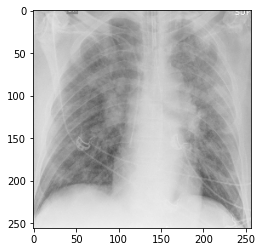

In [ ]:
#Testing Phase...
image = cv2.imread(lis2_test[13], 1)
image = cv2.resize(image, (img_height, img_width))
plt.imshow(image)

In [ ]:
predictions = model.predict(np.array([image]))

In [ ]:
predictions

array([[9.9424028e-01, 5.1013227e-03, 6.5844273e-04]], dtype=float32)

In [ ]:
temp = predictions[0][0]
index = 0
for i in range(3):
  if predictions[0][i] > temp:
    temp=predictions[0][i]
    index=i

In [ ]:
index

0

In [ ]:
predictions[0][index]

0.9942403

In [ ]:
print("You Are",names[index])

You Are COVID-19 Positive
